**Project by : Shweta Singh**





# Investigate a Dataset of Appointment "No Show"



## Table of Contents
* [Introduction](#Introduction)
* [Data Wrangling](#DataWrangling)
* [Exploratory Data Analysis](#ExploratoryDataAnalysis)
* [Conclusions](#Conclusions)
    
    
    
## Introduction <a name= "Introduction"></a>
In this project, I will analyze [Medical Appointment No Shows Dataset](https://www.kaggle.com/joniarroba/noshowappointments) and communicate my findings about it using Python libraries NumPy, pandas, Matplotlib, and seaborn. The dataset collects information from 110k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.Therefore,the aim of the study is to find out which factors have the greatest impact on preventing the patient from attending his appointment and which have the least effect.

I will answer the following question:

* Does gender have any affect on attendance?
* Do any medical conditions affect the attendance rate??
* Is there a specific age group with a higher attendance rate?
* Does receive a scholarship have any impact on attendance
* Does receive the SMS reminder have any impact on attendance?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Wrangling <a name= "DataWrangling"></a>

### General Properties

In [2]:
df = pd.read_csv("no_show_appointment.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# number of rows and column
df.shape

(110527, 14)

There are 110527 rows and 14 columns.

In [4]:
# columns data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
# check the missing values
df.isnull(). sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There is no missing data in any column, which is a good thing.

In [6]:
# check for the duplicate rows
df.duplicated().sum()

0

In [7]:
# number of non-null unique values for each column
df.nunique()

PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

The minimum age is -1 which is not correct, so we need to remove it, and the maximum age is 115 which is too high. The average age is 37.

In [9]:
df['AppointmentDay'].min(), df['AppointmentDay'].max()

('2016-04-29T00:00:00Z', '2016-06-08T00:00:00Z')

First appointment in the dataset was on 29-04-2016 and the last appointment was on 08-06-2016.

In [10]:
# checking missing data and data types together
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


As we know, there is no missing data.

## Data Cleaning

First, let's make sure all column names are lower case and separated by underscore:

In [11]:
df.columns.str.lower()

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [12]:
# manually editing the column names for more readability
df.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']

In [13]:
# checking the changes which I have done manually
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [14]:
# Checking for duplicates in some colmuns
df.duplicated().sum() , df.duplicated('patient_id').sum(), df.duplicated('appointment_id').sum()

(0, 48783, 0)

There no duplicates rows, all the appointment ids are having unique values.The columns "patient_id" and "appointment_id" are not required anymore, so we can remove them.

In [15]:
df.drop(['patient_id', 'appointment_id'], axis=1, inplace = True)

In [16]:
# checking for the changes
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [17]:
negative_age = df.query('age < 0')
negative_age

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [18]:
df.drop(negative_age.index, inplace=True)

In [19]:
df.query('age < 0')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


Row is dropped successfully.

In [20]:
df.rename(columns={'no_show': 'attended'}, inplace = True)
df.attended.replace(['No', 'Yes'],[1, 0], inplace =True)
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1


So, the changes are done. Now, we need to fix the data types.

In [21]:
df.gender = df.gender.astype('category')
df.scheduled_day = pd.to_datetime(df.scheduled_day)
df.appointment_day = pd.to_datetime(df.appointment_day)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   gender           110526 non-null  category           
 1   scheduled_day    110526 non-null  datetime64[ns, UTC]
 2   appointment_day  110526 non-null  datetime64[ns, UTC]
 3   age              110526 non-null  int64              
 4   neighbourhood    110526 non-null  object             
 5   scholarship      110526 non-null  int64              
 6   hypertension     110526 non-null  int64              
 7   diabetes         110526 non-null  int64              
 8   alcoholism       110526 non-null  int64              
 9   handicap         110526 non-null  int64              
 10  sms_received     110526 non-null  int64              
 11  attended         110526 non-null  int64              
dtypes: category(1), datetime64[ns, UTC](2), int64(8), object(1

In [23]:
df['delta_date'] = df.appointment_day - df.scheduled_day
df.delta_date.describe()

count                        110526
mean      9 days 17:08:42.047952517
std      15 days 05:51:31.240428096
min               -7 days +10:10:40
25%               -1 days +15:41:32
50%                 3 days 11:22:33
75%         14 days 07:41:37.750000
max               178 days 13:19:01
Name: delta_date, dtype: object

Still, there are some negative values. So, we need to investigate.

In [24]:
# Checking negative values
df[df.delta_date <= pd.Timedelta(0,'D')][['scheduled_day', 'appointment_day','delta_date']].head()

,scheduled_day,appointment_day,delta_date
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,-1 days +05:21:52
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,-1 days +07:51:33
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,-1 days +07:40:56
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,-1 days +06:30:29
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,-1 days +07:52:37


So, we got the output, and the -1 day difference is because the Appointment Day column does not contain information regarding the appointment time.

In [25]:
mask = ((df.delta_date <= pd.Timedelta(0, 'D')) & (df.delta_date >= pd.Timedelta(-1, 'D')))
df[mask].delta_date.aggregate([min,max, 'count'])

min      -1 days +03:15:06
max      -1 days +17:50:24
count                38562
Name: delta_date, dtype: object

In [26]:
# Replacing the values based on condition
df.loc[mask, 'delta_date'] = pd.Timedelta(0, 'D')
df[mask].head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended,delta_date
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0 days
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0 days
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,0 days
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0 days
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0 days


In [27]:
# Checking for the replacement
df[mask].delta_date.aggregate([min,max, 'count'])

min      0 days 00:00:00
max      0 days 00:00:00
count              38562
Name: delta_date, dtype: object

In [28]:
df.shape

(110526, 13)

In [29]:
df = df[df.delta_date >= pd.Timedelta(0,'D')]
df.shape

(110521, 13)

We are done with the data cleaning process and got 110,521 observations and 13 columns.
Now we are going to exploring our dataset!

## Exploratory Data Analysis

In [30]:
# Obtaining proportions for the binary features
ref = ['scholarship', 'hypertension','diabetes', 'alcoholism', 'handicap',
       'sms_received', 'attended']
df[ref].mean().round(2)

scholarship     0.10
hypertension    0.20
diabetes        0.07
alcoholism      0.03
handicap        0.02
sms_received    0.32
attended        0.80
dtype: float64

In [31]:
(df.groupby('gender').size() / df.shape[0]).round(2)

gender
F    0.65
M    0.35
dtype: float64

By looking at the proportion of the binary features, we can observe that:

* There is almost two times more female than male patients.
* Around 10% of patients receive the Scholarship.
* Around 20% of patients suffer from hypertension.
* Around 7% of the patients have diabetes.
* Only 3% suffer from alcoholism.
* Around 2% are handicapped.
* Hardly a third of patients have received the SMS reminder.
* Almost 80% of all patients did show up to their scheduled appointment.

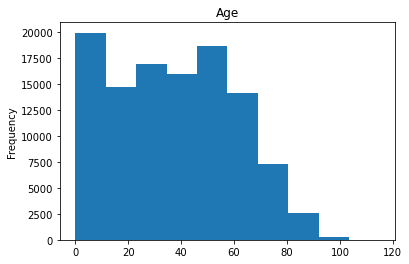

In [32]:
df.age.plot(kind='hist',bins =10)
plt.title('Age');

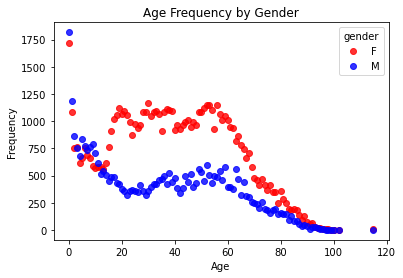

In [33]:
pd.crosstab(df.age, df.gender).plot(style=['or','ob'], alpha = 0.8);
plt.title('Age Frequency by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency');

As we can see, that Age histogram is having a higher number of bins, and there are three age groups with higher frequency than the others: there is a peak for very young patients; another one at around 30-35 years; and the last one around 45-55 years.

The second peak seems to be formed due to a high frequency of females, whereas the third peak contributes both male and female, as given their proportions in the dataset.

## Research Questions

Since we are interested in investigating the correlation between a specific variable and the outcome (show vs. no-show), it is worth writing a function used multiple times.

The function will cross-reference the desired variable against the outcome (column Attended), normalizing the result between Yes-Attended and No-Attended and plotting a bar chart with the respective title and labels:



In [34]:
def proportion_attendance(feature):
    pd.crosstab(df[feature], df.attended, normalize='columns').plot(kind='bar', alpha=0.85)
    plt.xlabel('Feature: {}'.format(feature.replace('_',' ').title()))
    plt.ylabel('Proportion')
    plt.title('Proportion of Attendance Rate by {}'.format(feature.replace('_',' ').title()))
    plt.margins(y=0.1)
    return plt

### Q1. Does gender have any affect on attendance?

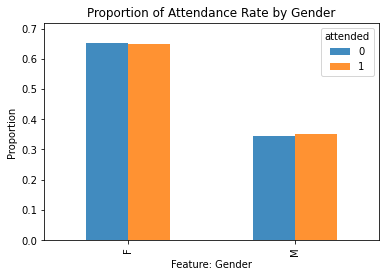

In [35]:
proportion_attendance('gender');

There is no clear evidence that gender has any influence on whether or not the patient will show up for their scheduled appointment.

### Q2. Do any medical conditions affect the attendance rate??

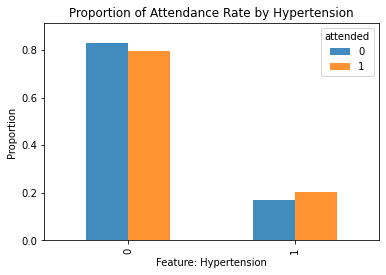

In [36]:
ref_list = ['hypertension', 'diabetes', 'alcoholism', 'handicap']

proportion_attendance('hypertension');

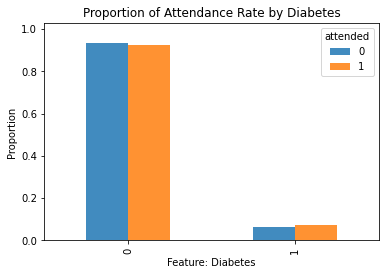

In [37]:
proportion_attendance('diabetes');

Both Hypertension and Diabetes seem to impact attendance rates, where patients with these medical conditions are more likely to show up. We can later use these variables in the classification model.

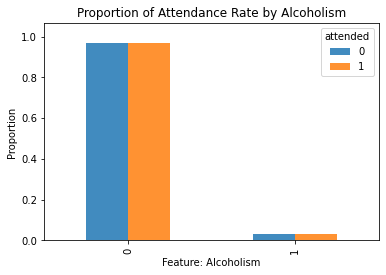

In [38]:
proportion_attendance('alcoholism');

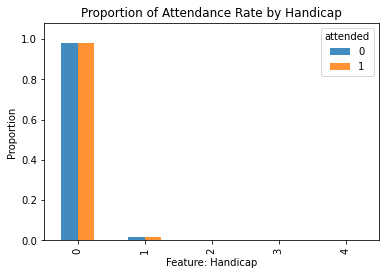

In [39]:
proportion_attendance('handicap');

On the other hand, neither Alcoholism nor Handicap seems to have any impact on the attendance rate. We should not use these variables to model appointment attendance probability.

### Q3. Is there a specific age group with a higher attendance rate?

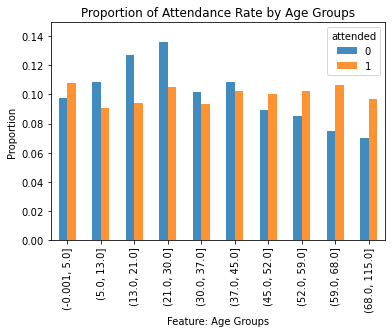

In [40]:
df['age_groups'] = pd.qcut(df.age, 10)
proportion_attendance('age_groups');

It looks like age does have some influence over the attendance rate. We can see that patients between 5 and 44 years old seem to be less likely to show up, whereas patients older than 45 seem to be more likely to attend their scheduled appointment. It is also possible to see that patients younger than five years old tend to be slightly more likely to attend.

Since the age groups present a distinctive proportion of attendance rate, we can create dummy variables to capture their influence in the classification model. We will tackle this step later.



### Q4. Does receive a scholarship (Bolsa Familia) have any impact on attendance?

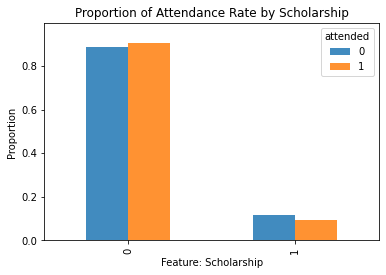

In [41]:
proportion_attendance('scholarship');

It looks like there is a slight but consistent difference in the proportion of attendance rate based on receiving the scholarship "Bolsa Familia." Patients who receive seem less likely to show up, whereas those who do not receive the governmental assistance benefit seem slightly more likely to attend their scheduled appointment.

We can use this variable as a possible explanatory variable in our classification model.

### Q5. Does receive the SMS reminder have any impact on attendance?

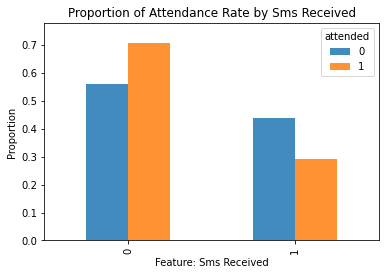

In [42]:
proportion_attendance('sms_received');

It looks like the attendance rate of patients that received the SMS reminder is quite different than those who did not receive it. But the interpretation of the observed effect doesn't make sense. It isn't reasonable that a patient would change their mind and decide not to go to their scheduled appointment after receiving the SMS reminder.

In this case, even though there is evidence this variable impacts the attendance rate, we should ignore it due to lack of explainability.

## Conclusions

After thoroughly investigating all the research questions, we were able to identify that some features seem to impact the likelihood of a patient attending the appointment scheduled. To be more specific, some particular groups of those features showed an attendance rate different than the other groups and the overall average.

Although it is essential to highlight that we cannot ascertain statistical significance without the proper statistical testing, there is indeed a correlation between the features and the attendance rate.

This descriptive statistical analysis allows us to identify features with possible correlation to the dependent variable - which would be interesting to investigate further using hypothesis testing and regression models.

Here is a summary of the initial findings:

* Gender does not seem to have any impact on the attendance rate;
* Age groups:
  * Less than 5 years and over 45 years old: seems to be more likely to show up
  * Between 5 and 45 years old: seems to be less likely to show up
* Date difference between appointment and when it was scheduled:
  * Appointments scheduled up to 4 days in advance: seems to be more likely to show up
  * Appointments scheduled more than 7 days in advance: less likely to attend

* Patients receiving Scholarship are less likely to show up;
* Medical Conditions: patients suffering from alcoholism and diabetes seems to be slightly more likely to attend
* SMS reminder: Although there is evidence receiving an SMS reminder seems to make the patients less likely to show up, we should ignore this variable due to lack of explainability.



## Limitations

* The dataset covers a short period 40 days only, longer period could lead to a better results.
* Appointment time wasn't given, which could be very useful.
* Dataset description on kaggle wasn't up to date, so some columns values weren't clear until found in disscussion forms.
* Recent data would be much better, since 2016 is about 4 years ago and a lot has changed since then.
